## Лабароторная работа 1
### Решение краевых задач. Методы коллокаций, наименьших квадратов и Галеркина

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time


def get_k(xi, i, c, d):
    return c(xi)*(i*(i - 1)*xi**(i - 2) - (i + 2)*(i + 1)*(xi**i))\
           +(1 + d(xi)*(xi**2))*((xi**i)*(1 - xi**2))

def colloc_method(a, b, nb, c, d):
    x = np.linspace(a, b, nb)
    a_vec, b_vec = [], np.tile(-1, nb)
    for xi in x:
        a_vec.append([get_k(xi, i, c, d) for i in range(nb)])
    sol_np = np.linalg.solve(a_vec, b_vec)
    return sol_np

def int_a(x, c, d, i, j): # solution of the integral, that's coeff by ai
    if (i + j) % 2 == 0:
        v1 = c*(i*(i-1)*((x**(i+j-1)/(i+j-1)) - x**(i+j+1)/(i+j+1)) 
                -(i+1)*(i+2)*(x**(i+j+1)/(i+j+1) - x**(i+j+3)/(i+j+3)))
        v2 = x**(i+j+1)/(i+j+1) - x**(i+j+3)*(2-d)/(i+j+3) \
             + x**(i+j+5)*(1-2*d)/(i+j+5)+x**(i+j+7)/(i+j+7)*d
        return v1 + v2
    else:
        return 0

def galerkin_method(a, b, nb, c=1, d=1):
    a_vec, b_vec = [], np.zeros(nb)
    for j in range(nb):
        b_vec[j] = (a**(j+1)-b**(j+1)) / (j+1) - (a**(j+3) - b**(j+3)) / (j+3)
        a_vec.append([int_a(b, c, d, i, j) - int_a(a, c, d, i, j) for i in range(nb)])
    sol_np = np.linalg.solve(a_vec, b_vec)
    return sol_np

def lsq_method(a, b, nd, nb, c, d):
    x = np.linspace(a, b, nd)
    a_vec, b_vec = [], np.zeros(nb)
    for i in range(nb):
        b_vec[i] = -2*sum(get_k(xi, i, c, d) for xi in x)
        a_vec.append([2*sum(get_k(xi, i, c, d)*get_k(xi, j, c, d) for xi in x)
                      for j in range(nb)])
    sol_np = np.linalg.solve(a_vec, b_vec)
    return sol_np
 
def draw(x_raw, y_raw, title, label=None, ylabel='y'):
    plt.plot(x_raw, y_raw, label=label)
    if label is not None:
        plt.legend()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel(ylabel)
    plt.grid(True)
    return plt 

Начальные данные

In [38]:
x0, xn = -1, 1
option = 13
n_bases = int(input('number of bases: '))
n_dots = int(input('number of dots: '))

#### Метод коллокаций
Основное задание

bases: 100
0.07679533958435059


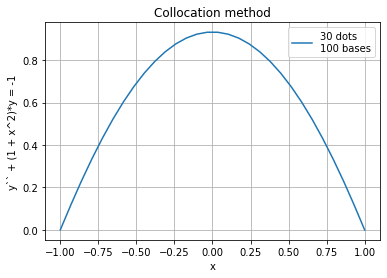

In [45]:
print(f'bases: {n_bases}')
t1 = time.time()
a_vec = colloc_method(x0, xn, n_bases, lambda val: 1, lambda val: 1)
print(time.time() - t1)
x = np.linspace(x0, xn, n_dots)
y = [sum(x[i]**j*(1-x[i]**2)*a_vec[j] for j in range(n_bases)) for i in range(n_dots)]
draw(x, y, 'Collocation method',
     f'{len(x)} dots\n{n_bases} bases',
     'y`` + (1 + x^2)*y = -1')
plt.show()

Задание по вариантам

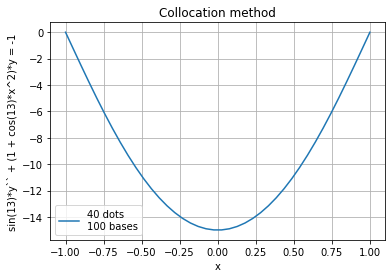

In [9]:
a_vec = colloc_method(x0, xn, n_bases, lambda val: np.sin(option), lambda val: np.cos(option))
x = np.linspace(x0, xn, n_dots)
y = [sum(x[i]**j*(1-x[i]**2)*a_vec[j] for j in range(n_bases)) for i in range(n_dots)]
draw(x, y, 'Collocation method',
     f'{len(x)} dots\n{n_bases} bases',
     f'sin({option})*y`` + (1 + cos({option})*x^2)*y = -1')
plt.show()

Усложненная версия

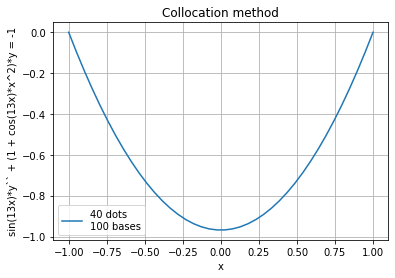

In [18]:
a_vec = colloc_method(x0, xn, n_bases, lambda val: np.sin(option*val), lambda val: np.cos(option*val))
x = np.linspace(x0, xn, n_dots)
y = [(1-x[i]**2)*a_vec[0] for i in range(n_dots)]
draw(x, y, 'Collocation method',
     f'{len(x)} dots\n{n_bases} bases',
     f'sin({option}x)*y`` + (1 + cos({option}x)*x^2)*y = -1')
plt.show()

#### Метод Галеркина
Основное задание

bases: 100
0.07479691505432129


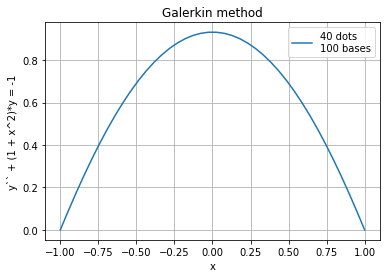

In [20]:
print(f'bases: {n_bases}')
t1 = time.time()
a_vec = galerkin_method(x0, xn, n_bases)
print(time.time() - t1)
x = np.linspace(x0, xn, n_dots)
y = [sum(x[i]**j*(1-x[i]**2)*a_vec[j] for j in range(n_bases)) for i in range(n_dots)]
draw(x, y, 'Galerkin method',
     f'{len(x)} dots\n{n_bases} bases',
     f'y`` + (1 + x^2)*y = -1')
plt.show()

Задание по вариантам

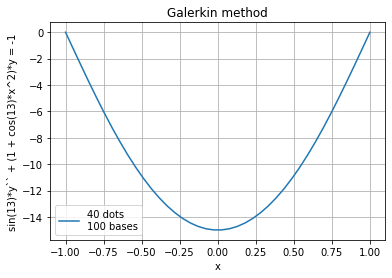

In [21]:
a_vec = galerkin_method(x0, xn, n_bases, np.sin(option), np.cos(option))
x = np.linspace(x0, xn, n_dots)
y = [sum(x[i]**j*(1-x[i]**2)*a_vec[j] for j in range(n_bases)) for i in range(n_dots)]
draw(x, y, 'Galerkin method',
     f'{len(x)} dots\n{n_bases} bases',
     f'sin({option})*y`` + (1 + cos({option})*x^2)*y = -1')
plt.show()

#### Метода наименьших квадратов
Основное задание

bases: 100
dots: 30
3.601682186126709


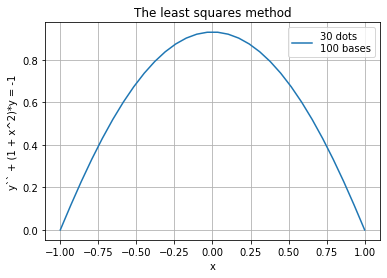

In [40]:
print(f'bases: {n_bases}\ndots: {n_dots}')
t1 = time.time()
a_vec = lsq_method(x0, xn, n_dots, n_bases, lambda val:1, lambda val:1)
print(time.time() - t1)
x = np.linspace(x0, xn, n_dots)
y = [sum(x[i]**j*(1-x[i]**2)*a_vec[j] for j in range(n_bases)) for i in range(n_dots)]
draw(x, y, 'The least squares method',
     f'{len(x)} dots\n{n_bases} bases',
     f'y`` + (1 + x^2)*y = -1')
plt.show()

Задание по вариантам

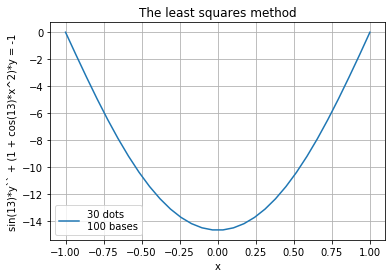

In [41]:
a_vec = lsq_method(x0, xn, n_dots, n_bases, lambda val:np.sin(option), lambda val:np.cos(option))
x = np.linspace(x0, xn, n_dots)
y = [sum(x[i]**j*(1-x[i]**2)*a_vec[j] for j in range(n_bases)) for i in range(n_dots)]
draw(x, y, 'The least squares method',
     f'{len(x)} dots\n{n_bases} bases',
     f'sin({option})*y`` + (1 + cos({option})*x^2)*y = -1')
plt.show()


Усложненная версия

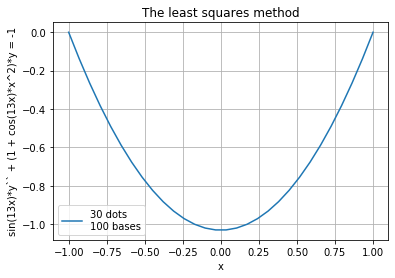

In [42]:
a_vec = lsq_method(x0, xn, n_dots, n_bases, lambda val: np.sin(option*val), lambda val: np.cos(option*val))
x = np.linspace(x0, xn, n_dots)
y = [sum(x[i]**j*(1-x[i]**2)*a_vec[j] for j in range(1)) for i in range(n_dots)]
draw(x, y, 'The least squares method',
     f'{len(x)} dots\n{n_bases} bases',
     f'sin({option}x)*y`` + (1 + cos({option}x)*x^2)*y = -1')
plt.show()
